## WEEK 12 

### Hierarchical clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hierarchical_clustering.xlsx to hierarchical_clustering.xlsx


In [ ]:
data = pd.read_excel('hierarchical_clustering.xlsx')
print(data)

   Variable 1  Variable 2
0        2.00         2.0
1        5.50         4.0
2        5.00         5.0
3        1.50         2.5
4        1.00         1.0
5        7.00         5.0
6        5.75         6.5


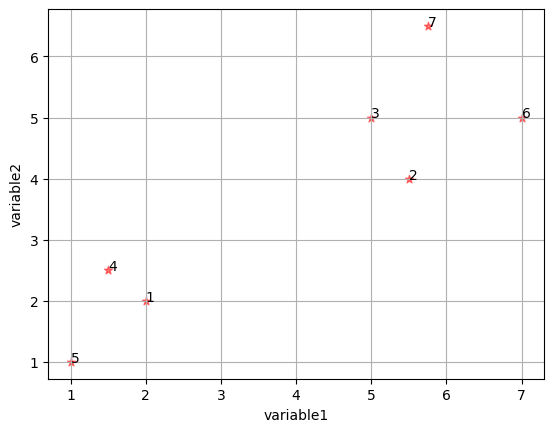

In [ ]:
x = data['Variable 1']
y = data['Variable 2']
n = range(1, 8)
fig, ax = plt.subplots()
ax.scatter(x, y, marker='*', c='red', alpha=0.5)
plt.grid()
plt.xlabel("variable1")
plt.ylabel("variable2")
for i, txt in enumerate(n):
  ax.annotate(txt, (x[i], y[i]))

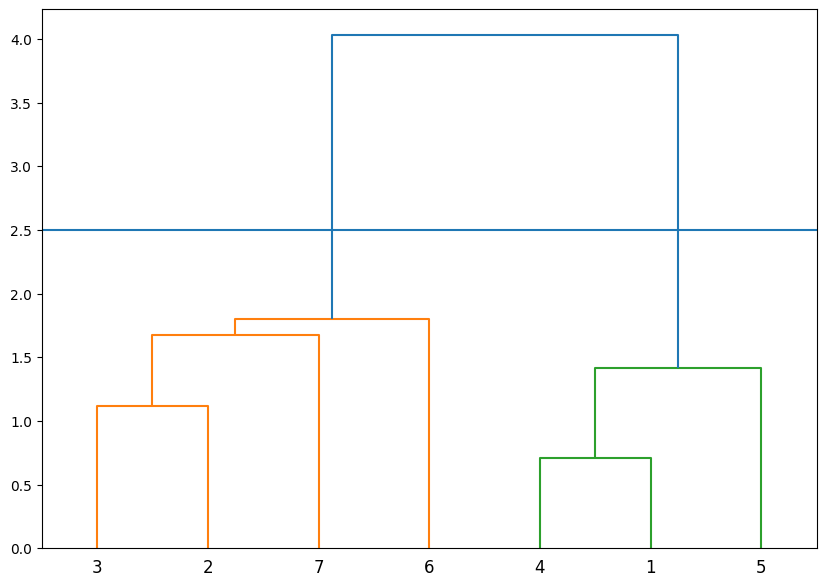

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(data, 'single')
labelList = range(1, 8)
plt.figure(figsize = (10, 7))
dendrogram(linked,
          orientation='top',
          labels=labelList,
          distance_sort='descending',
          show_leaf_counts=True)
plt.axhline(y=2.5)
plt.show()

In [ ]:
import sklearn
from sklearn.cluster import AgglomerativeClustering

k=2
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
Hclustering.fit(data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='single')

In [ ]:
Hclustering.fit_predict(data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 0, 0, 1, 1, 0, 0])

In [ ]:
print(Hclustering.labels_)

[1 0 0 1 1 0 0]


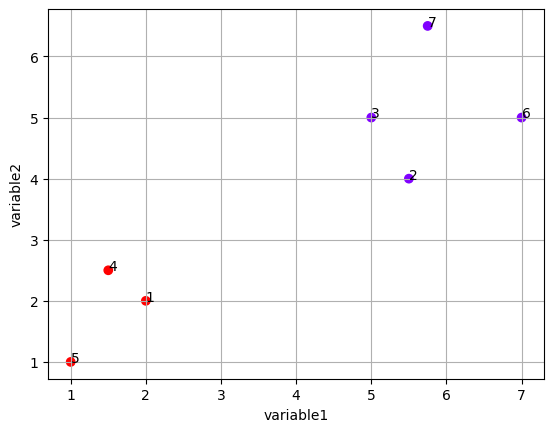

In [ ]:
x = data['Variable 1']
y = data['Variable 2']
n = range(1, 8)

fig, ax = plt.subplots()
ax.scatter(x, y, c=Hclustering.labels_, cmap='rainbow')
plt.grid()
plt.xlabel("variable1")
plt.ylabel("variable2")
for i, txt in enumerate(n):
  ax.annotate(txt, (x[i], y[i]))